<a href="https://colab.research.google.com/github/mcain368/Airbnb-in-New-York/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

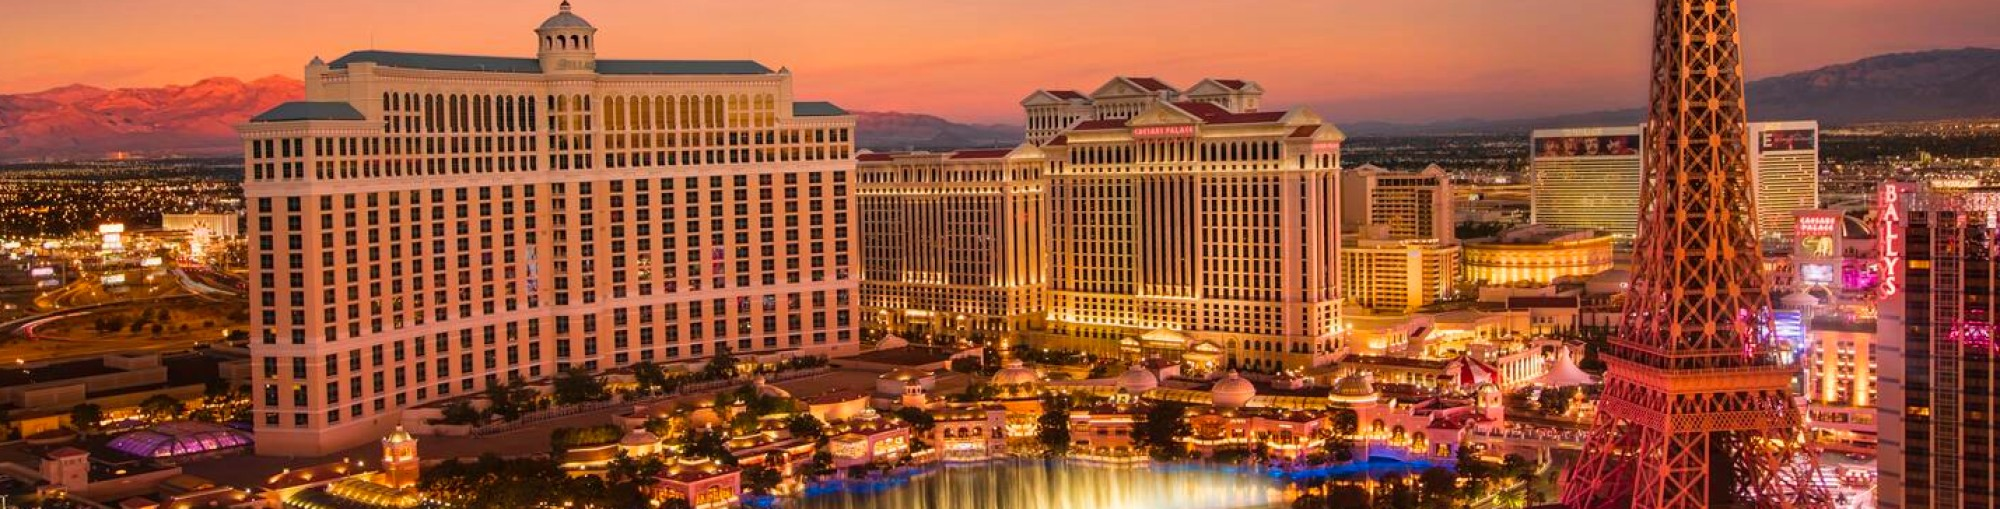

# ** Final Project: Group 8 U.S. Airbnb**

**Step 1: Import the data to clean**

In [ ]:
#!pip install kaggle --upgrade
from google.colab import drive
drive.mount('/content/drive')
#move files from my drive to colab
!cp -r /content/drive/MyDrive/kaggle.json /content
!cp -r /content/drive/MyDrive/test.db /content
drive.flush_and_unmount()

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!kaggle datasets download -d kritikseth/us-airbnb-open-data

 74% 17.0M/22.9M [00:00<00:00, 78.7MB/s]
100% 22.9M/22.9M [00:00<00:00, 87.5MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/us-airbnb-open-data.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# preview the csv file

Airbnbdata = pd.read_csv('/content/AB_US_2023.csv')
print(Airbnbdata.head(3))

     id                                               name  host_id  \
0   958              Bright, Modern Garden Unit - 1BR/1BTH     1169   
1  5858                                 Creative Sanctuary     8904   
2  8142  Friendly Room Apt. Style -UCSF/USF - San Franc...    21994   

          host_name neighbourhood_group     neighbourhood  latitude  \
0             Holly                 NaN  Western Addition  37.77028   
1  Philip And Tania                 NaN    Bernal Heights  37.74474   
2             Aaron                 NaN    Haight Ashbury  37.76555   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0 -122.43317  Entire home/apt    202               2                383   
1 -122.42089  Entire home/apt    235              30                111   
2 -122.45213     Private room     56              32                  9   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2023-02-19               2.31                             

<ipython-input-5-166d61e6c1b9>:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  Airbnbdata = pd.read_csv('/content/AB_US_2023.csv')


In [ ]:
Airbnbdata = pd.read_csv('/content/AB_US_2020.csv')
Airbnbdata.head(3)

<ipython-input-6-8f03415048ff>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  Airbnbdata = pd.read_csv('/content/AB_US_2020.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville


**Step 2: Cleanup**

In [ ]:
# @title
#Fixing inconsistent Column Names
Airbnbdata.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'city'],
      dtype='object')

In [ ]:
#Renaming Columns
Airbnbdata = Airbnbdata.rename(columns={'id':'LISTING_ID','name':'LISTING_NAME','host_id':'HOST_ID','host_name':'HOST_NAME','neighbourhood_group':'REGION','room_type':'LISTING_TYPE','availability_365':'ANNUAL_AVAILABILTY','last_review':'LAST_REVIEW_DATE','neighbourhood':'NEIGHBORHOOD','calculated_host_listings_count':'HOST_TOTAL_LISTINGS'})


In [ ]:
#Finding any missing data
Airbnbdata.isnull()

,LISTING_ID,LISTING_NAME,HOST_ID,HOST_NAME,REGION,NEIGHBORHOOD,latitude,longitude,LISTING_TYPE,price,minimum_nights,number_of_reviews,LAST_REVIEW_DATE,reviews_per_month,HOST_TOTAL_LISTINGS,ANNUAL_AVAILABILTY,city
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226025,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
226026,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
226027,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False
226028,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False


In [ ]:
#checking if the entire dataset nas null values
Airbnbdata.isnull().any().any()

True

In [ ]:
#Columns with NAN using integer to see how many are null
Airbnbdata.isnull().sum()

LISTING_ID                  0
LISTING_NAME               28
HOST_ID                     0
HOST_NAME                  33
REGION                 115845
NEIGHBORHOOD                0
latitude                    0
longitude                   0
LISTING_TYPE                0
price                       0
minimum_nights              0
number_of_reviews           0
LAST_REVIEW_DATE        48602
reviews_per_month       48602
HOST_TOTAL_LISTINGS         0
ANNUAL_AVAILABILTY          0
city                        0
dtype: int64

In [ ]:
# @title
#Dealing with missing data by adding a default value in the rows
column_to_fill = 'LAST_REVIEW_DATE'
default_text = 'N/A'
Airbnbdata[column_to_fill] = Airbnbdata[column_to_fill].fillna(default_text)

Column_to_fill = 'reviews_per_month'
DEFAULT = 0
Airbnbdata[Column_to_fill]=Airbnbdata[Column_to_fill].fillna(DEFAULT)


In [ ]:
#Removing unecessary columns
columns_remove =['latitude','longitude']
Airbnbdata = Airbnbdata.drop(columns=columns_remove)

In [ ]:
#Capitalizing column headings
Airbnbdata.columns.str.upper()

Index(['LISTING_ID', 'LISTING_NAME', 'HOST_ID', 'HOST_NAME', 'REGION',
       'NEIGHBORHOOD', 'LISTING_TYPE', 'PRICE', 'MINIMUM_NIGHTS',
       'NUMBER_OF_REVIEWS', 'LAST_REVIEW_DATE', 'REVIEWS_PER_MONTH',
       'HOST_TOTAL_LISTINGS', 'ANNUAL_AVAILABILTY', 'CITY'],
      dtype='object')

In [ ]:
#Capitalizing column headings
Airbnbdata.columns = Airbnbdata.columns.str.upper()



In [ ]:
#Drop Duplicate Rows
Airbnbdata.shape

(226030, 15)

In [ ]:
#Drop Duplicate Rows  (Column,row)
Airbnbdata = Airbnbdata.dropna()

In [ ]:
 Airbnbdata.shape

(110144, 15)

In [ ]:
#preview the clean data
Airbnbdata.head(10)

,LISTING_ID,LISTING_NAME,HOST_ID,HOST_NAME,REGION,NEIGHBORHOOD,LISTING_TYPE,PRICE,MINIMUM_NIGHTS,NUMBER_OF_REVIEWS,LAST_REVIEW_DATE,REVIEWS_PER_MONTH,HOST_TOTAL_LISTINGS,ANNUAL_AVAILABILTY,CITY
48150,5065,MAUKA BB,7257,Wayne,Hawaii,Hamakua,Entire home/apt,85,2,42,22/03/20,0.45,2,365,Hawaii
48151,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,Entire home/apt,124,30,10,01/03/20,0.09,5,261,Hawaii
48152,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,Entire home/apt,85,5,168,18/03/20,1.30,3,242,Hawaii
48153,5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,Entire home/apt,239,6,20,22/03/20,0.24,3,287,Hawaii
48154,5390,STAY AT PRINCE KUHIO!,7887,Todd,Kauai,Koloa-Poipu,Entire home/apt,92,3,143,10/08/20,1.03,1,116,Hawaii
48155,5434,Kauai Ocean View 3 Story Tiki Tower Princeville,7984,Ahlea,Kauai,North Shore Kauai,Entire home/apt,175,2,107,16/03/20,0.80,2,302,Hawaii
48156,7896,Beachfront Maui Sunset Condo,21844,Caroline,Maui,Kihei-Makena,Entire home/apt,120,4,28,11/05/18,0.23,1,344,Hawaii
48157,8833,Stay in the Heart of Kona,21349,Noah,Hawaii,North Kona,Entire home/apt,98,3,230,09/07/20,1.86,1,216,Hawaii
48158,9877,Keolamauloa Homestead,33179,Kaye,Hawaii,Hamakua,Entire home/apt,120,3,28,03/02/20,0.50,1,49,Hawaii
48159,13238,Studio On Princeville Golf Course / Paniolo C...,51647,Annie/Greg,Kauai,North Shore Kauai,Entire home/apt,129,3,112,04/03/20,1.50,2,354,Hawaii


**Step 3: Statistical Analysis**

In [ ]:
# Counting the price frequency base on the neighbourhood
Airbnbdata_counts = Airbnbdata[['NEIGHBORHOOD', 'PRICE']].value_counts().reset_index().sort_values(by='NEIGHBORHOOD')
Airbnbdata_counts

,NEIGHBORHOOD,PRICE,count
28773,Acton,255,1
32031,Acton,104,1
24179,Acton,58,1
28782,Adams,623,1
28783,Adams,495,1
...,...,...,...
16150,Yesler Terrace,65,1
16141,Yesler Terrace,180,1
15543,Yesler Terrace,130,2
16189,Yesler Terrace,104,1


In [ ]:
Airbnbdata.groupby('NEIGHBORHOOD')['PRICE'].count()

NEIGHBORHOOD
Acton                3
Adams              115
Adams-Normandie     35
Agoura Hills        38
Agua Dulce          14
                  ... 
Woodlawn            12
Woodrow              1
Woodside           348
Woonsocket           9
Yesler Terrace      27
Name: PRICE, Length: 635, dtype: int64

In [ ]:
# The minimum price for each neighbourhood
Airbnbdata_min = Airbnbdata.groupby('NEIGHBORHOOD')['PRICE'].min()
Airbnbdata_min

NEIGHBORHOOD
Acton               58
Adams               49
Adams-Normandie     25
Agoura Hills        40
Agua Dulce          35
                  ... 
Woodlawn            30
Woodrow            700
Woodside            15
Woonsocket          45
Yesler Terrace      60
Name: PRICE, Length: 635, dtype: int64

In [ ]:
# The maximum price for each neighbourhood
Airbnbdata_max = Airbnbdata.groupby('NEIGHBORHOOD')['PRICE'].max()
Airbnbdata_max

NEIGHBORHOOD
Acton               255
Adams               623
Adams-Normandie     300
Agoura Hills       1995
Agua Dulce         1143
                   ... 
Woodlawn            250
Woodrow             700
Woodside            299
Woonsocket          239
Yesler Terrace      195
Name: PRICE, Length: 635, dtype: int64

In [ ]:
# Calculate the difference between the maximum and minimum values
Airbnbdata_range = Airbnbdata_max - Airbnbdata_min
Airbnbdata_range

NEIGHBORHOOD
Acton               197
Adams               574
Adams-Normandie     275
Agoura Hills       1955
Agua Dulce         1108
                   ... 
Woodlawn            220
Woodrow               0
Woodside            284
Woonsocket          194
Yesler Terrace      135
Name: PRICE, Length: 635, dtype: int64

In [ ]:
# Standard deviation within each neighbourhood
Airbnbdata_std = Airbnbdata.groupby('NEIGHBORHOOD')['PRICE'].std()
Airbnbdata_std_notnull = Airbnbdata_std.dropna()#Airbnbdata_std[Airbnbdata_std.notnull()]
Airbnbdata_std_notnull

NEIGHBORHOOD
Acton              103.058236
Adams              102.834680
Adams-Normandie     66.912799
Agoura Hills       384.627478
Agua Dulce         323.441733
                      ...    
Woodland Hills     606.281755
Woodlawn            75.385223
Woodside            45.813274
Woonsocket          63.374767
Yesler Terrace      36.592621
Name: PRICE, Length: 619, dtype: float64

In [ ]:
# Mean within each neighbourhood
Airbnbdata_mean = Airbnbdata.groupby('NEIGHBORHOOD')['PRICE'].mean()
mean_std_index = Airbnbdata_mean.loc[Airbnbdata_std_notnull.index]
mean_std_index

NEIGHBORHOOD
Acton              139.000000
Adams              146.313043
Adams-Normandie     83.828571
Agoura Hills       225.026316
Agua Dulce         220.357143
                      ...    
Woodland Hills     236.554745
Woodlawn            99.750000
Woodside            59.606322
Woonsocket          91.111111
Yesler Terrace     109.407407
Name: PRICE, Length: 619, dtype: float64

In [ ]:
# Distribution and Outlier based on end user's input

# Uppercase all values in the neighborhood column
Airbnbdata['NEIGHBORHOOD'] = Airbnbdata['NEIGHBORHOOD'].str.upper()

# Create a while loop if the user wanted to see more than one neighborhood
while True:
  selected_neighborhood = input('Please enter the neighborhood(ENTER 0 TO EXIT): ').upper()

  # Plot the distribution based on the end user's input
  if selected_neighborhood in Airbnbdata['NEIGHBORHOOD'].values:
    neighborhood_data = Airbnbdata[Airbnbdata['NEIGHBORHOOD'] == selected_neighborhood]
    plt.figure(figsize=(10, 6))
    sns.histplot(neighborhood_data['PRICE'], kde=True, color='skyblue') #https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751
    plt.title(f'Distribution of Airbnb Prices in {selected_neighborhood}')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

    # Outlier based on the neighborhood
    Q1 = neighborhood_data['PRICE'].quantile(0.25) #https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
    Q3 = neighborhood_data['PRICE'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = (neighborhood_data['PRICE'] < lower) | (neighborhood_data['PRICE'] > upper) #https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/

    # Display outliers
    print(f'Outliers in {selected_neighborhood}:')
    print(neighborhood_data.loc[outliers, ['HOST_ID', 'PRICE']])

  elif selected_neighborhood == "0":
        break

  else:
    print(f'Neighborhood "{selected_neighborhood}" not found.')

Please enter the neighborhood(ENTER 0 TO EXIT): 0


**Step 4: Visualization**

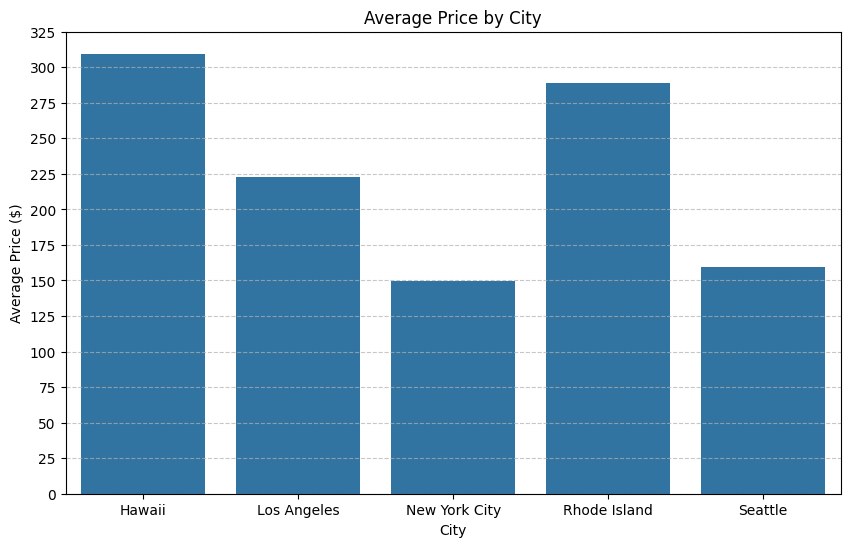

In [ ]:
# Bar Plot - Average Price for Each City

plt.figure(figsize=(10, 6))
sns.barplot(x='CITY', y='PRICE', data=Airbnbdata, estimator=np.mean, errorbar=None)
plt.yticks(range(0, 330, 25))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('City')
plt.ylabel('Average Price ($)')
plt.title('Average Price by City')
plt.show()

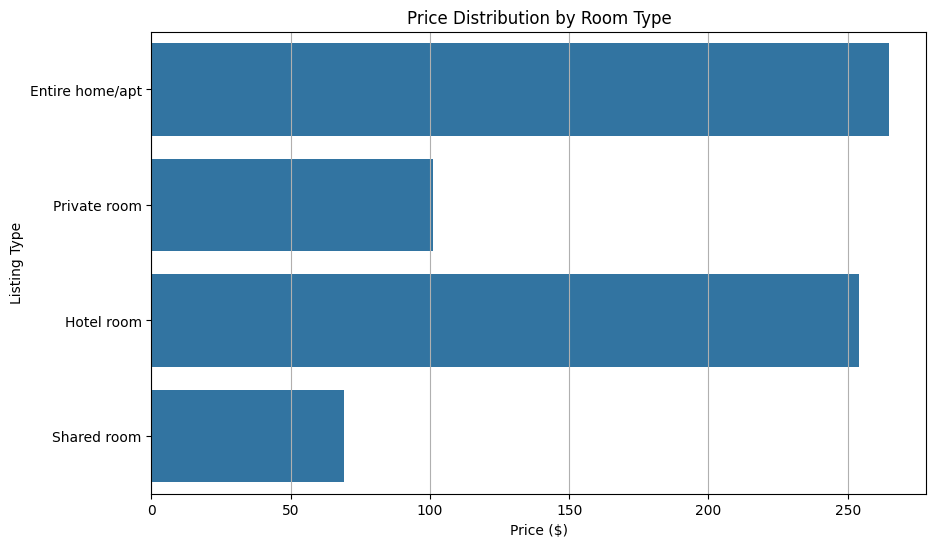

In [ ]:
# Bar Plot - Average Price by Listing Type

plt.figure(figsize=(10, 6))
sns.barplot(y='LISTING_TYPE', x='PRICE', data=Airbnbdata, errorbar=None)
plt.ylabel('Listing Type')
plt.xlabel('Price ($)')
plt.grid(axis='x')
plt.title('Price Distribution by Room Type')
plt.show()

**Filtering Data for Listings in New York City**

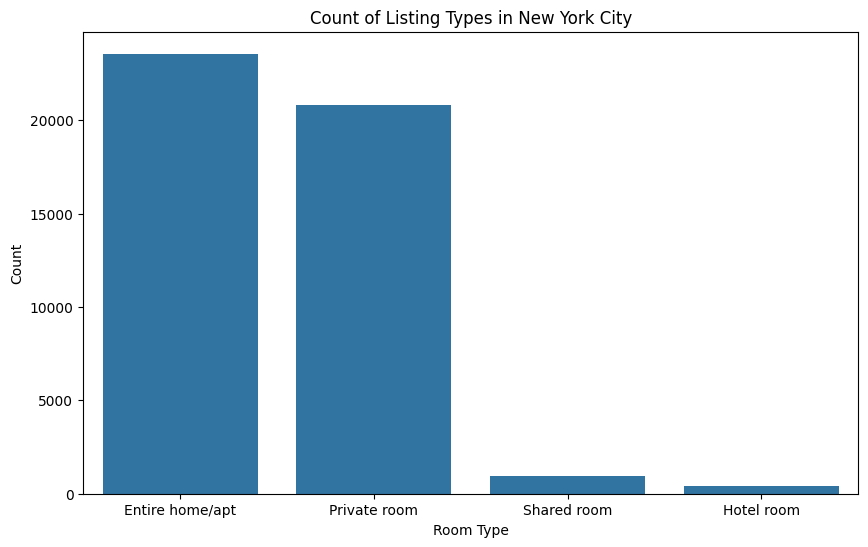

In [ ]:
# Filter data for listings in New York City
# Count the occurrences of each room type #Barplot

NYC_data = Airbnbdata[Airbnbdata['CITY'] == 'New York City']

plt.figure(figsize=(10, 6))

sns.countplot(x='LISTING_TYPE', data=NYC_data)

plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Count of Listing Types in New York City')

plt.show()


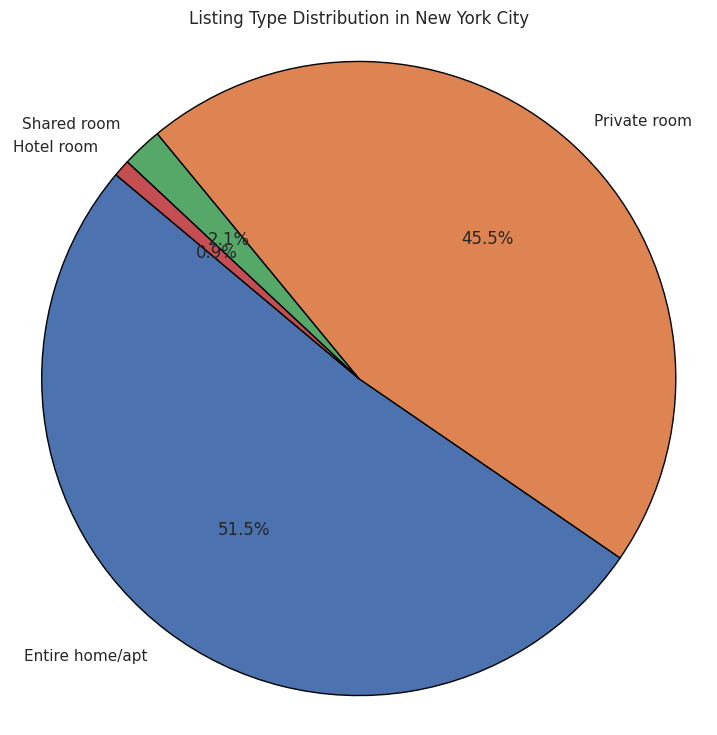

In [ ]:
# Count the occurrences of each room type #PieChart

room_type_counts = NYC_data['LISTING_TYPE'].value_counts()

plt.figure(figsize=(9, 9))

sns.set(style='darkgrid')
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

plt.axis('equal')
plt.title('Listing Type Distribution in New York City')

plt.show()


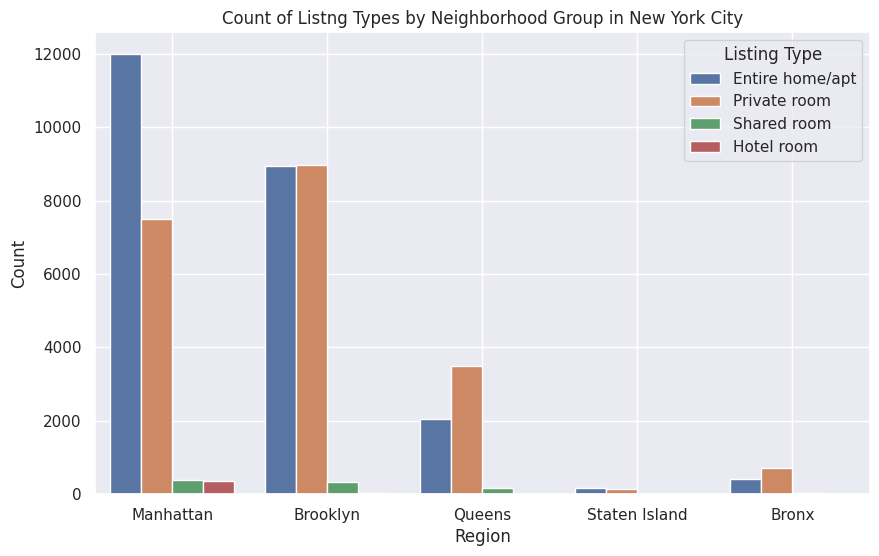

In [ ]:
#Count of Room Types by Neighbourhood Group in New York City #Grouped Bar Chart

plt.figure(figsize=(10, 6))

sns.countplot(x= 'REGION', hue='LISTING_TYPE', data=NYC_data)

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Count of Listng Types by Neighborhood Group in New York City')
plt.grid(True)

plt.legend(title='Listing Type')

plt.show()

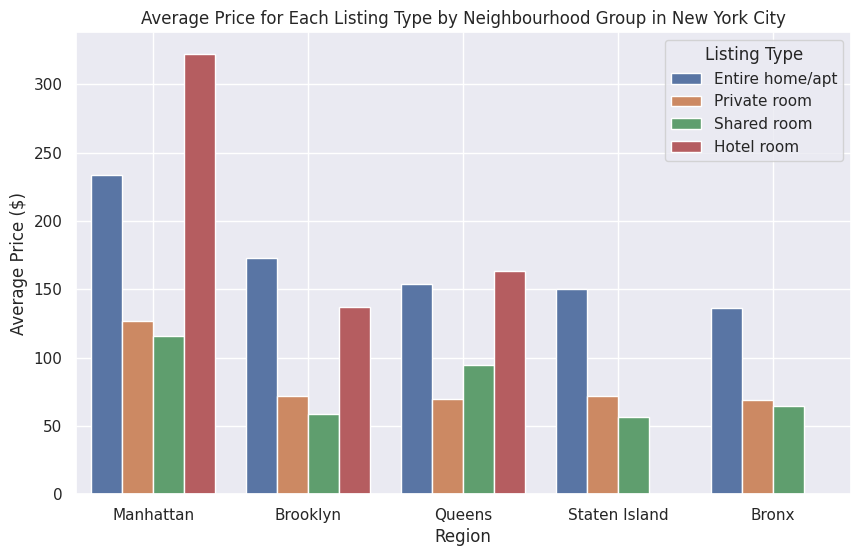

In [ ]:
# Bar plot for Average Price by Room Type and Neighbourhood Group

plt.figure(figsize=(10, 6))

sns.barplot(x='REGION', y='PRICE', hue='LISTING_TYPE', data=NYC_data, estimator=np.mean, errorbar=None)

plt.xlabel('Region')
plt.ylabel('Average Price ($)')
plt.title('Average Price for Each Listing Type by Neighbourhood Group in New York City')
plt.grid(True)

plt.legend(title='Listing Type')

plt.show()

**Step 5: Export the clean data to a database**

In [ ]:
import sqlite3

In [ ]:
connection = sqlite3.connect("test.db")

In [ ]:
Airbnbdata.head(3)

,LISTING_ID,LISTING_NAME,HOST_ID,HOST_NAME,REGION,NEIGHBORHOOD,LISTING_TYPE,PRICE,MINIMUM_NIGHTS,NUMBER_OF_REVIEWS,LAST_REVIEW_DATE,REVIEWS_PER_MONTH,HOST_TOTAL_LISTINGS,ANNUAL_AVAILABILTY,CITY
48150,5065,MAUKA BB,7257,Wayne,Hawaii,HAMAKUA,Entire home/apt,85,2,42,22/03/20,0.45,2,365,Hawaii
48151,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,SOUTH KOHALA,Entire home/apt,124,30,10,01/03/20,0.09,5,261,Hawaii
48152,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,SOUTH KONA,Entire home/apt,85,5,168,18/03/20,1.30,3,242,Hawaii


In [ ]:
with connection:
    cursor = connection.cursor()
    cursor.execute("DROP TABLE IF EXISTS Airbnbdata")

In [ ]:
Airbnbdata.to_sql('Airbnbdata', connection, index=False)

110144

In [ ]:
pd.read_sql("SELECT * FROM Airbnbdata", connection)

,LISTING_ID,LISTING_NAME,HOST_ID,HOST_NAME,REGION,NEIGHBORHOOD,LISTING_TYPE,PRICE,MINIMUM_NIGHTS,NUMBER_OF_REVIEWS,LAST_REVIEW_DATE,REVIEWS_PER_MONTH,HOST_TOTAL_LISTINGS,ANNUAL_AVAILABILTY,CITY
0,5065,MAUKA BB,7257,Wayne,Hawaii,HAMAKUA,Entire home/apt,85,2,42,22/03/20,0.45,2,365,Hawaii
1,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,SOUTH KOHALA,Entire home/apt,124,30,10,01/03/20,0.09,5,261,Hawaii
2,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,SOUTH KONA,Entire home/apt,85,5,168,18/03/20,1.30,3,242,Hawaii
3,5389,Keauhou Villa,7878,Edward,Hawaii,NORTH KONA,Entire home/apt,239,6,20,22/03/20,0.24,3,287,Hawaii
4,5390,STAY AT PRINCE KUHIO!,7887,Todd,Kauai,KOLOA-POIPU,Entire home/apt,92,3,143,10/08/20,1.03,1,116,Hawaii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110139,43805501,"Modern Boutique Apt in S. Lake Union, Gym +Pet...",218805459,Eric,Cascade,SOUTH LAKE UNION,Entire home/apt,109,30,0,N/A,0.00,29,90,Seattle
110140,43807087,Beautiful & Bright Downtown Studio,130366604,Logan,Downtown,BELLTOWN,Entire home/apt,119,1,0,N/A,0.00,9,82,Seattle
110141,43807576,3 BDRM/1.75 bath Top Queen Anne home@quiet street,7435040,Chengying,Queen Anne,WEST QUEEN ANNE,Entire home/apt,299,1,0,N/A,0.00,12,328,Seattle
110142,43807578,Perfect & Bright Downtown Studio,130366604,Logan,Downtown,BELLTOWN,Entire home/apt,119,1,0,N/A,0.00,9,74,Seattle
